In [1]:
import tensorflow as tf
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [0]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [4]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
neg, pos = np.bincount(raw_df['Class'])

In [7]:
print(neg, pos)

284315 492


In [8]:
raw_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
# Clean Data
cleaned_df = raw_df.copy()

cleaned_df.pop('Time')

eps = 0.001
cleaned_df['Log_Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [10]:
temp_df = raw_df.copy()

temp_df.pop('Amount') # pop return the col, 

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [11]:
temp_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log_Ammount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [0]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=1228)

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1228)

In [14]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(182276, 30)
(45569, 30)
(56962, 30)


In [15]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log_Ammount
206807,2.002212,-0.412104,-0.298077,0.176465,-0.823882,-0.758675,-0.562872,-0.026263,1.457674,-0.187886,-0.871371,0.085580,-0.762901,0.117758,0.820352,0.192728,-0.394588,-0.259950,-0.032754,-0.285190,-0.201407,-0.449678,0.411086,-0.062924,-0.543554,-0.277394,0.008177,-0.039432,0,-0.369615
80814,0.229259,-1.244529,0.317636,-1.313461,0.747466,4.569391,-0.781469,0.977984,0.088845,0.371947,-1.106239,-0.211068,0.178290,-1.147245,-0.740335,-1.304687,-0.349925,1.721268,-0.316410,0.012108,-0.321702,-0.390166,0.454307,0.995782,-0.511260,0.423029,-0.179718,-0.271758,0,5.093143
90360,1.069822,-0.816987,1.337401,0.438071,-1.189930,1.088308,-1.233928,0.599446,1.719992,-0.406629,0.113935,0.747444,-1.565240,-0.603284,-1.871223,-0.478590,0.523852,-0.428983,0.774314,-0.169156,-0.187110,-0.161023,-0.006708,-0.228570,0.137117,1.064302,-0.003866,-0.001573,0,3.162136
52461,1.234320,-0.778038,0.003486,-0.696913,-0.923626,-0.620905,-0.378933,-0.093465,-1.056957,0.855808,0.762735,-0.029822,-0.546020,0.512418,0.269894,-0.989721,-0.335534,1.591587,-0.364981,-0.349614,-0.319383,-0.684560,-0.066401,0.027050,0.232625,1.037399,-0.090057,0.003068,0,4.454708
222688,-2.582919,2.127435,-0.179581,-0.623134,-1.543274,-0.700215,-1.102233,1.809870,0.299249,-0.614331,-1.766459,0.561146,0.226519,0.701498,-0.157337,0.661782,0.108742,0.284338,-0.436351,-0.010245,0.284850,0.738185,-0.110245,0.028606,0.169938,0.655086,0.160949,0.112366,0,1.821480


In [16]:
train_df.shape

(182276, 30)

In [0]:
train_labels = train_df.pop('Class').values

In [0]:
val_labels = val_df.pop('Class').values
test_labels = test_df.pop('Class').values

In [0]:
train_features = train_df.values
val_features = val_df.values
test_features = test_df.values

In [20]:
train_features

array([[ 2.00221170e+00, -4.12104100e-01, -2.98076704e-01, ...,
         8.17715706e-03, -3.94322359e-02, -3.69615455e-01],
       [ 2.29258629e-01, -1.24452935e+00,  3.17636067e-01, ...,
        -1.79718137e-01, -2.71757995e-01,  5.09314265e+00],
       [ 1.06982198e+00, -8.16987125e-01,  1.33740100e+00, ...,
        -3.86584830e-03, -1.57339807e-03,  3.16213615e+00],
       ...,
       [ 1.20137544e+00,  3.71212311e-01,  2.94326333e-01, ...,
         1.64839039e-02,  2.66137435e-02,  3.29513291e+00],
       [ 1.10469484e+00,  8.24175921e-02,  1.91558363e-01, ...,
         1.39426596e-02,  2.33052588e-02,  3.98696349e+00],
       [-6.50880204e-01, -4.54491060e-01,  1.40402519e+00, ...,
         7.53885085e-03,  4.40460777e-02,  2.30268509e+00]])

In [21]:
train_features.shape

(182276, 29)

In [0]:
scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

In [0]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [24]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)
print()
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)

Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [0]:
# Check Pos & Neg

pos_df = pd.DataFrame(train_features[train_labels == 1], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[train_labels == 0], columns=train_df.columns)

In [26]:
pos_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log_Ammount
0,-1.033633,-0.679507,-0.750199,0.766027,-0.006579,0.319747,3.110962,-0.967298,-0.059050,1.227834,1.013152,-0.720911,-1.541036,0.344759,0.325641,-0.490952,-0.971821,0.583963,1.072639,0.041962,-0.427778,0.792367,0.780125,1.249016,-0.272798,-1.248718,1.267143,-0.275119,1.733730
1,-2.780256,4.992242,-5.000000,5.000000,-2.276176,-2.399706,-5.000000,3.559389,-5.000000,-5.000000,5.000000,-5.000000,-0.170929,-5.000000,-1.490048,-5.000000,-5.000000,-5.000000,-0.708394,1.683535,2.491901,-0.366997,-0.493130,-1.979386,2.590389,1.259141,3.924218,2.434642,-1.454727
2,-0.808564,1.965983,-2.731705,1.663210,-1.029028,-1.418316,-2.882123,1.271632,-1.100526,-5.000000,5.000000,-5.000000,1.366701,-5.000000,-0.524025,-2.973597,-5.000000,-0.661465,0.431334,0.406077,0.675439,-0.751800,-0.121118,-0.699797,0.237317,0.666051,0.657253,0.400424,-1.454727
3,-0.537611,2.629070,-3.976561,3.745189,1.086836,-1.655556,-1.255263,0.526706,-3.677377,-5.000000,3.468440,-5.000000,-1.681870,-5.000000,-0.232434,-1.627393,-3.828274,0.070701,-2.218386,0.684328,0.535500,-1.300096,-0.596899,-0.361705,0.506154,0.100686,2.110893,1.601603,-4.869156
4,0.948445,-0.072647,-1.314217,0.268494,0.347983,-0.509061,0.245713,-0.235423,0.729057,-0.910274,-0.480269,0.904276,1.372057,-1.973619,-0.211673,0.098814,1.157422,0.065503,0.231071,0.192850,-0.277900,-0.703059,0.124208,0.642030,0.015618,-0.251131,-0.049655,0.019221,0.861104


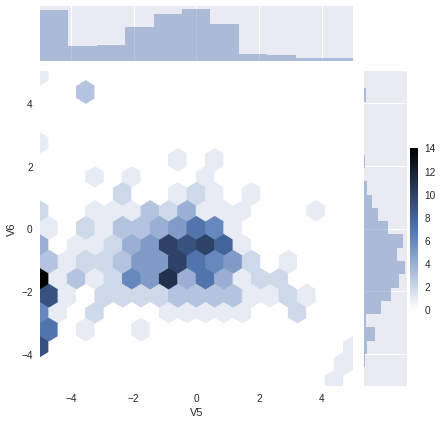

In [27]:
plt.style.use('seaborn')

sns.jointplot(pos_df['V5'] , pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.colorbar()

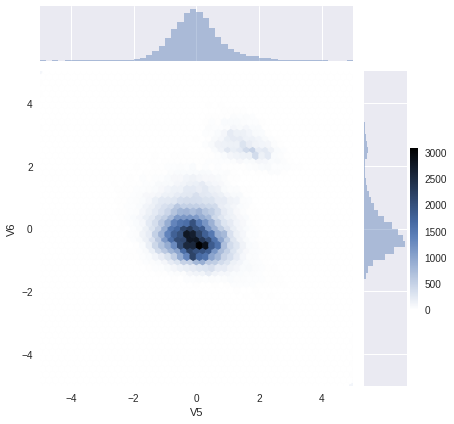

In [28]:
sns.jointplot(neg_df['V5'] , neg_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.colorbar()

In [0]:
# Define Model Metrics

METRICS = [tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalsePositives(name='fp'),
           tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='auc')]

In [0]:
class Simple_model(tf.keras.Model):
  def __init__(self, units, activation, do_rate):
    super(Simple_model, self).__init__()
    self.units = units
    self.activation = activation
    self.do_rate = do_rate

    self.layer_1 = tf.keras.layers.Dense(units)
    self.layer_1_act = tf.keras.activations.get(self.activation)
    self.layer_1_do = tf.keras.layers.Dropout(do_rate)
    
    self.layer_2 = tf.keras.layers.Dense(units)
    self.layer_2_act = tf.keras.activations.get(self.activation)
    self.layer_2_do = tf.keras.layers.Dropout(do_rate)

    self.out_layer = tf.keras.layers.Dense(1, activation='sigmoid')
    
  def call(self, inputs):
    x = self.layer_1(inputs)
    x = self.layer_1_act(x)
    x = self.layer_1_do(x)
    x = self.layer_2(x)
    x = self.layer_2_act(x)
    x = self.layer_2_do(x)
    out_ = self.out_layer(x)
    return out_

## Relu

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = Simple_model(128, 'relu', 0.3)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=METRICS)

In [0]:
EPOCHS = 100
BATCH_SIZE = 1024

my_call_es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', verbose=1, patience=10, mode='max', restore_best_weights=True)
my_call_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.3, patience=4, verbose=1, mode='max')

In [51]:
hist = model.fit(train_features, 
                 train_labels,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 validation_data=(val_features, val_labels),
                 callbacks=[my_call_es, my_call_lr])

Epoch 1/100
179/179 [==============================] - 2s 14ms/step - loss: 0.0303 - tp: 72.0000 - fp: 1192.0000 - tn: 226268.0000 - fn: 313.0000 - accuracy: 0.9934 - precision: 0.0570 - recall: 0.1870 - auc: 0.7994 - val_loss: 0.0038 - val_tp: 28.0000 - val_fp: 8.0000 - val_tn: 45486.0000 - val_fn: 47.0000 - val_accuracy: 0.9988 - val_precision: 0.7778 - val_recall: 0.3733 - val_auc: 0.9391 - lr: 3.0000e-04
Epoch 2/100
179/179 [==============================] - 2s 9ms/step - loss: 0.0049 - tp: 152.0000 - fp: 24.0000 - tn: 181942.0000 - fn: 158.0000 - accuracy: 0.9990 - precision: 0.8636 - recall: 0.4903 - auc: 0.9030 - val_loss: 0.0028 - val_tp: 61.0000 - val_fp: 11.0000 - val_tn: 45483.0000 - val_fn: 14.0000 - val_accuracy: 0.9995 - val_precision: 0.8472 - val_recall: 0.8133 - val_auc: 0.9459 - lr: 3.0000e-04
Epoch 3/100
179/179 [==============================] - 2s 10ms/step - loss: 0.0042 - tp: 208.0000 - fp: 40.0000 - tn: 181926.0000 - fn: 102.0000 - accuracy: 0.9992 - precision: 

### Elu

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = Simple_model(128, 'elu', 0.3)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=METRICS)

In [0]:
EPOCHS = 100
BATCH_SIZE = 1024

my_call_es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', verbose=1, patience=10, mode='max', restore_best_weights=True)
my_call_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.3, patience=4, verbose=1, mode='max')

In [57]:
hist = model.fit(train_features, 
                 train_labels,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 validation_data=(val_features, val_labels),
                 callbacks=[my_call_es, my_call_lr])

Epoch 1/100
179/179 [==============================] - 2s 14ms/step - loss: 0.0615 - tp: 212.0000 - fp: 2934.0000 - tn: 224526.0000 - fn: 173.0000 - accuracy: 0.9864 - precision: 0.0674 - recall: 0.5506 - auc: 0.8323 - val_loss: 0.0040 - val_tp: 55.0000 - val_fp: 12.0000 - val_tn: 45482.0000 - val_fn: 20.0000 - val_accuracy: 0.9993 - val_precision: 0.8209 - val_recall: 0.7333 - val_auc: 0.9331 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 2s 9ms/step - loss: 0.0068 - tp: 207.0000 - fp: 67.0000 - tn: 181899.0000 - fn: 103.0000 - accuracy: 0.9991 - precision: 0.7555 - recall: 0.6677 - auc: 0.9043 - val_loss: 0.0036 - val_tp: 57.0000 - val_fp: 12.0000 - val_tn: 45482.0000 - val_fn: 18.0000 - val_accuracy: 0.9993 - val_precision: 0.8261 - val_recall: 0.7600 - val_auc: 0.9398 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 2s 10ms/step - loss: 0.0058 - tp: 210.0000 - fp: 47.0000 - tn: 181919.0000 - fn: 100.0000 - accuracy: 0.9992 - precision: 0.8171

## class weight

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = Simple_model(128, 'relu', 0.3)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=METRICS)

In [0]:
EPOCHS = 100
BATCH_SIZE = 1024

my_call_es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', verbose=1, patience=10, mode='max', restore_best_weights=True)
my_call_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.3, patience=4, verbose=1, mode='max')

In [79]:
giving_weights = pd.DataFrame(train_labels)[0].value_counts()

giving_weights

0    181966
1       310
Name: 0, dtype: int64

In [0]:
giving_weights[0]

class_0 = 1 - giving_weights[0] / (giving_weights[0] + giving_weights[1])

class_1 = 1 - giving_weights[1] / (giving_weights[0] + giving_weights[1])

In [82]:
# My Class weights

hist = model.fit(train_features, 
                 train_labels,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 class_weight={0:class_0, 1:class_1},
                 validation_data=(val_features, val_labels),
                 callbacks=[my_call_es, my_call_lr])

Epoch 1/100
179/179 [==============================] - 3s 14ms/step - loss: 0.0011 - tp: 276.0000 - fp: 6826.0000 - tn: 191496.0000 - fn: 62.0000 - accuracy: 0.9653 - precision: 0.0389 - recall: 0.8166 - auc: 0.9114 - val_loss: 0.1780 - val_tp: 70.0000 - val_fp: 1411.0000 - val_tn: 44083.0000 - val_fn: 5.0000 - val_accuracy: 0.9689 - val_precision: 0.0473 - val_recall: 0.9333 - val_auc: 0.9746 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 2s 10ms/step - loss: 6.2160e-04 - tp: 279.0000 - fp: 5746.0000 - tn: 176220.0000 - fn: 31.0000 - accuracy: 0.9683 - precision: 0.0463 - recall: 0.9000 - auc: 0.9713 - val_loss: 0.1213 - val_tp: 70.0000 - val_fp: 1252.0000 - val_tn: 44242.0000 - val_fn: 5.0000 - val_accuracy: 0.9724 - val_precision: 0.0530 - val_recall: 0.9333 - val_auc: 0.9764 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 2s 9ms/step - loss: 5.1919e-04 - tp: 289.0000 - fp: 6104.0000 - tn: 175862.0000 - fn: 21.0000 - accuracy: 0.9664 - precis

In [0]:
# Plot Evaluation

hist_df = pd.DataFrame(hist.history)

In [85]:
hist_df

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,lr
0,0.001102,276.0,6826.0,191496.0,62.0,0.965328,0.038862,0.816568,0.911365,0.177960,70.0,1411.0,44083.0,5.0,0.968926,0.047265,0.933333,0.974605,0.001000
1,0.000622,279.0,5746.0,176220.0,31.0,0.968306,0.046307,0.900000,0.971262,0.121312,70.0,1252.0,44242.0,5.0,0.972415,0.052950,0.933333,0.976357,0.001000
2,0.000519,289.0,6104.0,175862.0,21.0,0.966397,0.045206,0.932258,0.981316,0.116600,70.0,1336.0,44158.0,5.0,0.970572,0.049787,0.933333,0.980590,0.001000
3,0.000481,287.0,5313.0,176653.0,23.0,0.970726,0.051250,0.925806,0.983928,0.100973,71.0,1271.0,44223.0,4.0,0.972020,0.052906,0.946667,0.981834,0.001000
4,0.000415,288.0,5484.0,176482.0,22.0,0.969793,0.049896,0.929032,0.989739,0.096854,71.0,1319.0,44175.0,4.0,0.970967,0.051079,0.946667,0.982575,0.001000
5,0.000377,292.0,6513.0,175453.0,18.0,0.964170,0.042910,0.941935,0.992697,0.070118,71.0,1034.0,44460.0,4.0,0.977221,0.064253,0.946667,0.982411,0.001000
6,0.000345,293.0,5010.0,176956.0,17.0,0.972421,0.055252,0.945161,0.993611,0.091641,71.0,1419.0,44075.0,4.0,0.968773,0.047651,0.946667,0.982083,0.001000
7,0.000346,295.0,5820.0,176146.0,15.0,0.967988,0.048242,0.951613,0.992733,0.070125,71.0,1096.0,44398.0,4.0,0.975861,0.060840,0.946667,0.982503,0.001000
8,0.000335,295.0,5238.0,176728.0,15.0,0.971181,0.053316,0.951613,0.993554,0.077873,71.0,1311.0,44183.0,4.0,0.971143,0.051375,0.946667,0.981423,0.001000
9,0.000284,298.0,5111.0,176855.0,12.0,0.971894,0.055093,0.961290,0.995713,0.058532,71.0,885.0,44609.0,4.0,0.980491,0.074268,0.946667,0.981066,0.000300


In [0]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [0]:
## Plot Auc

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

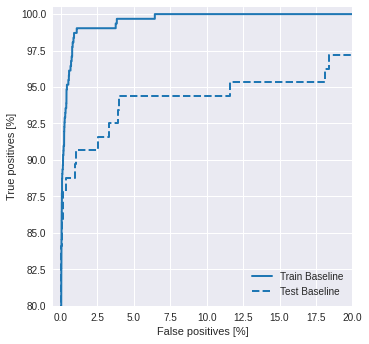

In [91]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [0]:
optimizer = tf.keras.optimizers.Adam()
model = Simple_model(128, 'relu', 0.3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=METRICS)

In [0]:
neg = giving_weights[0]
pos = giving_weights[1]
total = neg + pos

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

In [94]:
weight_for_0

0.5008518074805183

In [95]:
weight_for_1

293.9935483870968

In [96]:
hist = model.fit(train_features, 
                 train_labels,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 class_weight={0:weight_for_0, 1:weight_for_1},
                 validation_data=(val_features, val_labels),
                 callbacks=[my_call_es, my_call_lr])

Epoch 1/100
179/179 [==============================] - 2s 14ms/step - loss: 0.2954 - tp: 328.0000 - fp: 8079.0000 - tn: 219381.0000 - fn: 57.0000 - accuracy: 0.9643 - precision: 0.0390 - recall: 0.8519 - auc: 0.9466 - val_loss: 0.1260 - val_tp: 71.0000 - val_fp: 984.0000 - val_tn: 44510.0000 - val_fn: 4.0000 - val_accuracy: 0.9783 - val_precision: 0.0673 - val_recall: 0.9467 - val_auc: 0.9827 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 2s 10ms/step - loss: 0.1783 - tp: 280.0000 - fp: 5469.0000 - tn: 176497.0000 - fn: 30.0000 - accuracy: 0.9698 - precision: 0.0487 - recall: 0.9032 - auc: 0.9711 - val_loss: 0.1316 - val_tp: 71.0000 - val_fp: 1466.0000 - val_tn: 44028.0000 - val_fn: 4.0000 - val_accuracy: 0.9677 - val_precision: 0.0462 - val_recall: 0.9467 - val_auc: 0.9821 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 2s 10ms/step - loss: 0.1378 - tp: 287.0000 - fp: 5853.0000 - tn: 176113.0000 - fn: 23.0000 - accuracy: 0.9678 - precision: 0.0

In [0]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

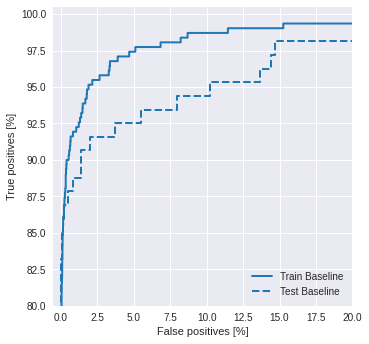

In [98]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

## Oversampling

In [0]:
bool_train_labels = train_labels != 0

In [0]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

In [0]:
pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [121]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181966, 29)

In [122]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))

np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363932, 29)

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = Simple_model(128, 'relu', 0.3)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=METRICS)

In [0]:
EPOCHS = 100
BATCH_SIZE = 1024

my_call_es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', verbose=1, patience=10, mode='max', restore_best_weights=True)
my_call_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.3, patience=4, verbose=1, mode='max')

In [142]:
giving_weights = pd.DataFrame(train_labels)[0].value_counts()

giving_weights

0    181966
1       310
Name: 0, dtype: int64

In [0]:
giving_weights[0]

class_0 = 1 - giving_weights[0] / (giving_weights[0] + giving_weights[1])

class_1 = 1 - giving_weights[1] / (giving_weights[0] + giving_weights[1])

In [144]:
print(class_0)
print(class_1)

0.0017007175931005314
0.9982992824068995


In [145]:
# My Class weights

hist = model.fit(resampled_features, 
                 resampled_labels,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                #  class_weight={0:class_0, 1:class_1},
                 validation_data=(val_features, val_labels),
                 callbacks=[my_call_es, my_call_lr])

Epoch 1/100
356/356 [==============================] - 4s 11ms/step - loss: 0.1130 - tp: 172013.0000 - fp: 8042.0000 - tn: 219418.0000 - fn: 10028.0000 - accuracy: 0.9559 - precision: 0.9553 - recall: 0.9449 - auc: 0.9920 - val_loss: 0.0352 - val_tp: 70.0000 - val_fp: 591.0000 - val_tn: 44903.0000 - val_fn: 5.0000 - val_accuracy: 0.9869 - val_precision: 0.1059 - val_recall: 0.9333 - val_auc: 0.9749 - lr: 0.0010
Epoch 2/100
356/356 [==============================] - 3s 8ms/step - loss: 0.0262 - tp: 181131.0000 - fp: 2067.0000 - tn: 179899.0000 - fn: 835.0000 - accuracy: 0.9920 - precision: 0.9887 - recall: 0.9954 - auc: 0.9993 - val_loss: 0.0179 - val_tp: 70.0000 - val_fp: 257.0000 - val_tn: 45237.0000 - val_fn: 5.0000 - val_accuracy: 0.9943 - val_precision: 0.2141 - val_recall: 0.9333 - val_auc: 0.9713 - lr: 0.0010
Epoch 3/100
356/356 [==============================] - 3s 9ms/step - loss: 0.0138 - tp: 181773.0000 - fp: 1122.0000 - tn: 180844.0000 - fn: 193.0000 - accuracy: 0.9964 - pre

In [0]:
hist_df = pd.DataFrame(hist.history)

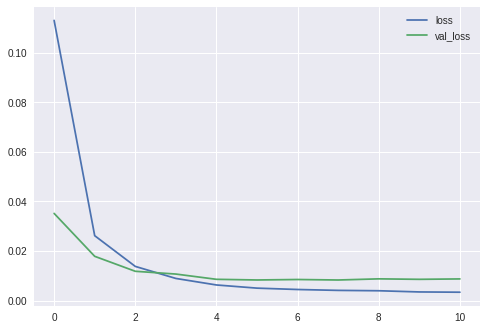

In [148]:
hist_df[['loss', 'val_loss']].plot()

In [0]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

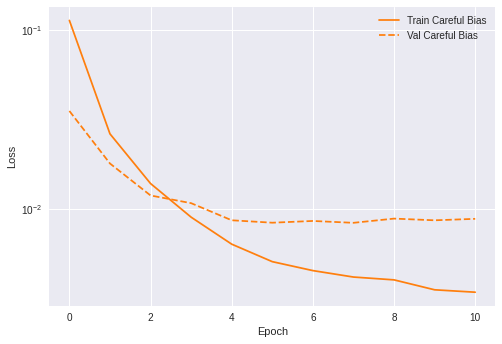

In [152]:
plot_loss(hist, "Careful Bias", 1)

In [153]:
hist_df.head()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,lr
0,0.113022,172013.0,8042.0,219418.0,10028.0,0.955873,0.955336,0.944914,0.991989,0.035183,70.0,591.0,44903.0,5.0,0.986921,0.105900,0.933333,0.974935,0.001
1,0.026200,181131.0,2067.0,179899.0,835.0,0.992026,0.988717,0.995411,0.999344,0.017882,70.0,257.0,45237.0,5.0,0.994250,0.214067,0.933333,0.971313,0.001
2,0.013811,181773.0,1122.0,180844.0,193.0,0.996387,0.993865,0.998939,0.999623,0.011844,68.0,138.0,45356.0,7.0,0.996818,0.330097,0.906667,0.965602,0.001
3,0.008955,181885.0,700.0,181266.0,81.0,0.997854,0.996166,0.999555,0.999731,0.010725,68.0,97.0,45397.0,7.0,0.997718,0.412121,0.906667,0.965781,0.001
4,0.006323,181919.0,476.0,181490.0,47.0,0.998563,0.997390,0.999742,0.999794,0.008603,68.0,55.0,45439.0,7.0,0.998639,0.552846,0.906667,0.952802,0.001


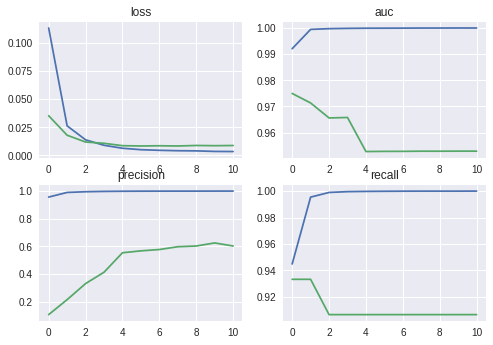

In [155]:
# plot metrics

eval_metrics = ['loss', 'auc', 'precision', 'recall']

for n, metric in enumerate(eval_metrics):
  # name = metric.replace('_', '').caplitalize()
  val_name = 'val_' + metric

  plt.subplot(2, 2, n+1)
  hist_df[metric].plot()
  hist_df[val_name].plot()
  plt.title(metric)

In [0]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

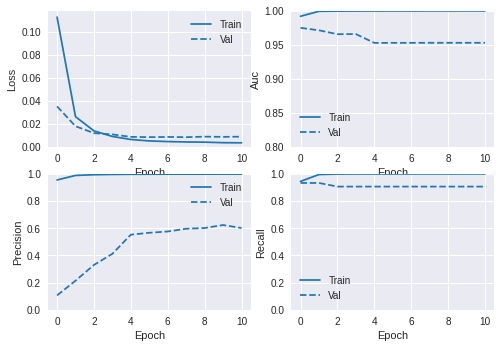

In [157]:
plot_metrics(hist)

In [0]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  54914
Legitimate Transactions Incorrectly Detected (False Positives):  1941
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  98
Total Fraudulent Transactions:  107


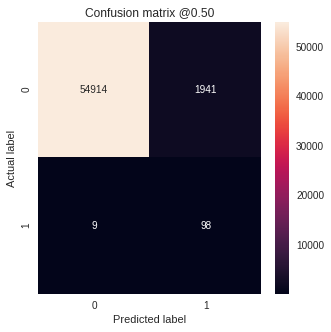

In [159]:
plot_cm(test_labels, test_predictions_baseline)